In [19]:
# min labb 2 

# Import libraries and define helper functions
import math
import matplotlib.pyplot as plt
def distance(point1, point2):
    return math.sqrt((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)

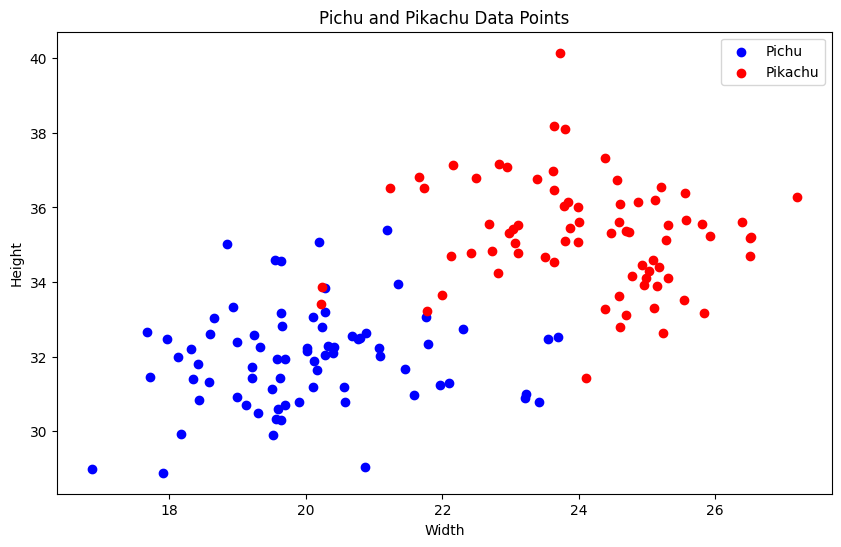

Loaded 75 Pichu points and 75 Pikachu points


In [20]:
# Load and plot data
def load_and_plot_data(filename):
    pichu_data, pikachu_data = [], []
    with open(filename, 'r') as file:
        next(file)  # Skip header
        for line in file:
            width, height, label = map(float, line.strip().split(','))
            if label == 0:
                pichu_data.append((width, height))
            else:
                pikachu_data.append((width, height))
    # Plot the data
    plt.figure(figsize=(10, 6))
    plt.scatter([p[0] for p in pichu_data], [p[1] for p in pichu_data], color='blue', label='Pichu')
    plt.scatter([p[0] for p in pikachu_data], [p[1] for p in pikachu_data], color='red', label='Pikachu')
    plt.xlabel('Width')
    plt.ylabel('Height')
    plt.title('Pichu and Pikachu Data Points')
    plt.legend()
    plt.show()
    return pichu_data, pikachu_data
# Load and plot the data
pichu_data, pikachu_data = load_and_plot_data("datapoint.txt")
print(f"Loaded {len(pichu_data)} Pichu points and {len(pikachu_data)} Pikachu points")



In [21]:
# Load test points
def load_test_points(filename):
    test_points = []
    with open(filename, 'r') as file:
        next(file)  # Skip header
        for line in file:
            parts = line.split('(')[1].split(')')[0].split(',')
            test_points.append((float(parts[0]), float(parts[1])))
    return test_points
test_points = load_test_points("testpoints.txt")
print(f"Loaded {len(test_points)} test points")

Loaded 4 test points


In [22]:
# Define the classifier function
def classify_point(point, pichu_data, pikachu_data):
    all_data = pichu_data + pikachu_data
    nearest_point = min(all_data, key=lambda p: distance(point, p))
    return "Pichu" if nearest_point in pichu_data else "Pikachu"

In [23]:
# Classify test points
for point in test_points:
    result = classify_point(point, pichu_data, pikachu_data)
    print(f"Point {point} classified as {result}")

Point (25.0, 32.0) classified as Pikachu
Point (24.2, 31.5) classified as Pikachu
Point (22.0, 34.0) classified as Pikachu
Point (20.5, 34.0) classified as Pichu


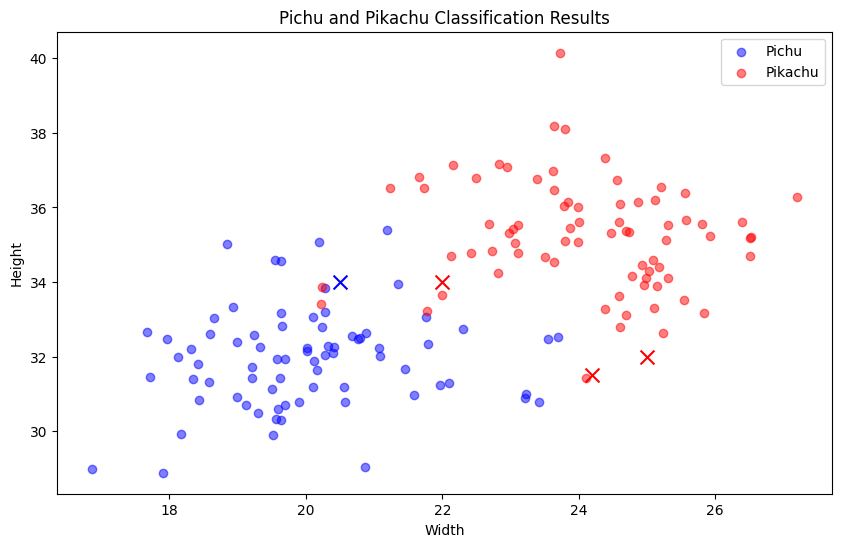

In [24]:
# Plot test points with classification
plt.figure(figsize=(10, 6))
plt.scatter([p[0] for p in pichu_data], [p[1] for p in pichu_data], color='blue', label='Pichu', alpha=0.5)
plt.scatter([p[0] for p in pikachu_data], [p[1] for p in pikachu_data], color='red', label='Pikachu', alpha=0.5)
for point in test_points:
    result = classify_point(point, pichu_data, pikachu_data)
    color = 'blue' if result == 'Pichu' else 'red'
    plt.scatter(point[0], point[1], color=color, marker='x', s=100)
plt.xlabel('Width')
plt.ylabel('Height')
plt.title('Pichu and Pikachu Classification Results')
plt.legend()
plt.show()